<a href="https://colab.research.google.com/github/Neha-Nayak/PySpark-1/blob/main/LinePlotSemesterVersusTotal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Line Plot for Student performance**



Installing PySpark

In [5]:
#!pip install pyspark

     |████████████████████████████████| 281.4 MB 36 kB/s 
     |████████████████████████████████| 198 kB 43.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=ee8e43a517e139e2d886ec7f6f1a0715bae41e0d97f56b1e5655d82f42c8b2ce
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


Importing required modules

In [6]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
spark=SparkSession.builder.appName("Visualisation").getOrCreate()

Reading the given Result_data 

In [10]:
df_ResultData=spark.read.csv("Results_Data.csv",header=True,inferSchema=True)
df_ResultData.head(10)

[Row(USN='4JN18CS001', SCODE='18MAT11', CIE=32, SEE=41, TOT=73, RESULT='P', GRADE=8, DATE='12019', ExamType='Regular'),
 Row(USN='4JN18CS001', SCODE='18PHY12', CIE=29, SEE=47, TOT=76, RESULT='P', GRADE=8, DATE='12019', ExamType='Regular'),
 Row(USN='4JN18CS001', SCODE='18ELE13', CIE=25, SEE=43, TOT=68, RESULT='P', GRADE=7, DATE='12019', ExamType='Regular'),
 Row(USN='4JN18CS001', SCODE='18CIV14', CIE=31, SEE=26, TOT=57, RESULT='P', GRADE=6, DATE='12019', ExamType='Regular'),
 Row(USN='4JN18CS001', SCODE='18EGDL15', CIE=31, SEE=56, TOT=87, RESULT='P', GRADE=9, DATE='12019', ExamType='Regular'),
 Row(USN='4JN18CS001', SCODE='18PHYL16', CIE=32, SEE=40, TOT=72, RESULT='P', GRADE=8, DATE='12019', ExamType='Regular'),
 Row(USN='4JN18CS001', SCODE='18ELEL17', CIE=34, SEE=52, TOT=86, RESULT='P', GRADE=9, DATE='12019', ExamType='Regular'),
 Row(USN='4JN18CS001', SCODE='18EGH18', CIE=27, SEE=32, TOT=59, RESULT='P', GRADE=6, DATE='12019', ExamType='Regular'),
 Row(USN='4JN18CS002', SCODE='18MAT11

In [11]:
df_ResultData.show(10)

+----------+--------+---+---+---+------+-----+-----+--------+
|       USN|   SCODE|CIE|SEE|TOT|RESULT|GRADE| DATE|ExamType|
+----------+--------+---+---+---+------+-----+-----+--------+
|4JN18CS001| 18MAT11| 32| 41| 73|     P|    8|12019| Regular|
|4JN18CS001| 18PHY12| 29| 47| 76|     P|    8|12019| Regular|
|4JN18CS001| 18ELE13| 25| 43| 68|     P|    7|12019| Regular|
|4JN18CS001| 18CIV14| 31| 26| 57|     P|    6|12019| Regular|
|4JN18CS001|18EGDL15| 31| 56| 87|     P|    9|12019| Regular|
|4JN18CS001|18PHYL16| 32| 40| 72|     P|    8|12019| Regular|
|4JN18CS001|18ELEL17| 34| 52| 86|     P|    9|12019| Regular|
|4JN18CS001| 18EGH18| 27| 32| 59|     P|    6|12019| Regular|
|4JN18CS002| 18MAT11| 33| 51| 84|     P|    9|12019| Regular|
|4JN18CS002| 18PHY12| 36| 45| 81|     P|    9|12019| Regular|
+----------+--------+---+---+---+------+-----+-----+--------+
only showing top 10 rows



Columns USN, DATE and TOTAL are formatted for our test case.

In [23]:
df_ResultData.select('DATE').distinct().collect()

[Row(DATE='Jul-20'),
 Row(DATE='72019'),
 Row(DATE='12019'),
 Row(DATE='20-Jul'),
 Row(DATE='12020'),
 Row(DATE='Jan-20')]

In [95]:
from pyspark.sql.functions import when
dfT = df_ResultData.withColumn("DATE", when(df_ResultData.DATE == 'Jul-20','2020_7')
                                 .when(df_ResultData.DATE == '20-Jul','2020_7')
                                 .when(df_ResultData.DATE == 'Jan-20','2020_1')
                                 .when(df_ResultData.DATE == '12019','2019_1')
                                 .when(df_ResultData.DATE == '72019','2019_7')
                                 .when(df_ResultData.DATE == '12020','2020_1')
                                 .when(df_ResultData.DATE == '72020','2020_7'))
dfT.select('DATE').distinct().collect()

[Row(DATE='2020_1'),
 Row(DATE='2019_7'),
 Row(DATE='2020_7'),
 Row(DATE='2019_1')]

In [98]:
def filter(usn):
  dftry1=dfT.filter(dfT.USN == usn)
  return dftry1

Selecting a particular USN for whom the performance graph will be plotted

In [115]:
df_usn=filter('4JN17CS010')
df_data=df_usn.select('DATE','TOT')
df_data.show(10)

+------+---+
|  DATE|TOT|
+------+---+
|2019_1| 69|
|2019_1| 69|
|2019_1| 57|
|2019_1| 61|
|2019_1| 43|
|2019_1| 48|
|2019_1| 83|
|2019_1| 91|
|2019_1| 34|
|2019_7| 77|
+------+---+
only showing top 10 rows



Obtaining Average of Total marks for a student in a particulat semester. 

In [116]:
dfPlot1=df_data.groupBy("DATE").avg("TOT")
dfPlot=dfPlot1.sort('DATE')
dfPlot.show()

+------+------------------+
|  DATE|          avg(TOT)|
+------+------------------+
|2019_1|61.666666666666664|
|2019_7|62.666666666666664|
|2020_1|             67.75|
|2020_7|            78.125|
+------+------------------+



Line plot for Student performance, which determines the average of total marks obtained by the student in a particular semester.

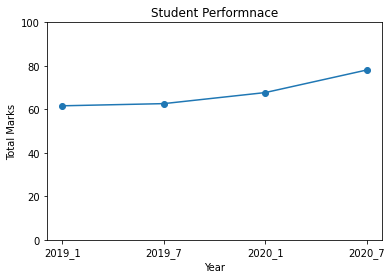

In [120]:
plt.title('Student Performnace')
plt.xlabel('Year')
plt.ylabel('Total Marks')
x=dfPlot.toPandas()['DATE'].values.tolist()
y=dfPlot.toPandas()['avg(TOT)'].values.tolist()
plt.plot(x,y,marker = 'o')
plt.ylim(0,100)
plt.show()